<img src="images/keepcoding.png" width=200 align="left">

# M√≥dulo de Matem√°ticas 101: pr√°ctica

Vamos a poner de nuevo en pr√°ctica lo que hemos visto en este m√≥dulo. La pr√°ctica se centra en la regresi√≥n lineal (¬°tema muy importante!) y pod√©is preguntarme las dudas que teng√°is por Discord. ¬°Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresi√≥n lineal con m√≠nimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresi√≥n lineal con el m√©todo de los m√≠nimos cuadrados. Para ello, tendr√°s que:

- Explorar un dataset
- Implementar la regresi√≥n lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa c√≥mo se define en los apuntes). Sabemos que los pesos van a ser los par√°metros de la ecuaci√≥n lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y adem√°s un t√©rmino independiente o bias.

### 1.1 Carga del dataset y exploraci√≥n de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican c√≥mo descargar el dataset con su librer√≠a (podemos consultar el c√≥digo fuente si queremos).

In [1]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


In [12]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la funci√≥n `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
X.head()

displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
y.head()

mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

En este punto, puedes hacer cualquier otro an√°lisis exploratorio que creas conveniente.

In [16]:
# comprueba el tama√±o del dataset
print(X.shape)
print(y.shape)

(398, 7)
(398, 1)


In [13]:
# Recuento de valores nulos por columna
print(X.isnull().sum()) 




displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [14]:
"""
Se calcula la mediana de horsepower para rellenar campos nulos
"""
mediana_hp = X['horsepower'].median()
print("Mediana de horsepower:", mediana_hp)

X.loc[:, 'horsepower'] = X['horsepower'].fillna(mediana_hp)



Mediana de horsepower: 93.5


In [15]:
print(X['horsepower'].isnull().sum())  # Deber√≠a imprimir 0


0


    A continuaci√≥n, crea una funci√≥n a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gr√°fica del target (consumo en millas por gal√≥n) vs la variable que le ha llegado por par√°metro. Puedes ver un ejemplo de gr√°fica m√°s abajo, pero usa los par√°metros que quieras en cuanto a color de los puntos, grids etc.

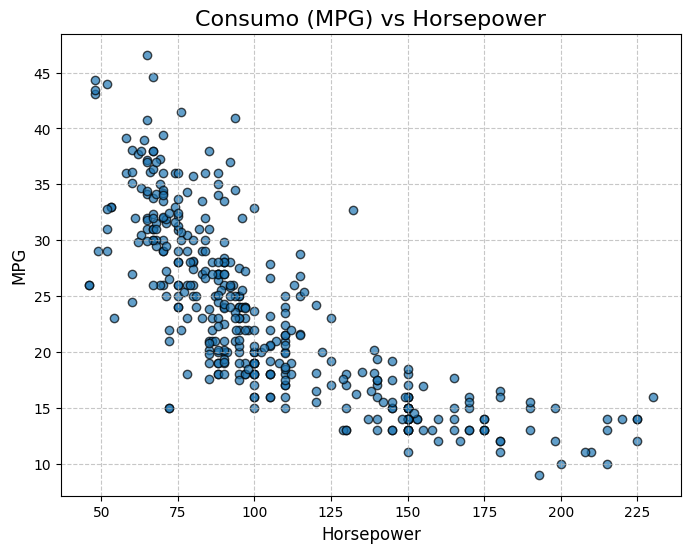

In [17]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # Verificar que la columna existe
    if nombre_columna not in df.columns:
        print(f"Error: La columna '{nombre_columna}' no existe en el DataFrame.")
        return

    # Crear el gr√°fico de dispersi√≥n
    plt.figure(figsize=(8, 6))
    plt.scatter(df[nombre_columna], y, alpha=0.7, edgecolor='k')
    plt.title(f"Consumo (MPG) vs {nombre_columna.capitalize()}", fontsize=16)
    plt.xlabel(nombre_columna.capitalize(), fontsize=12)
    plt.ylabel("MPG", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    

visualiza(X, y, 'horsepower')

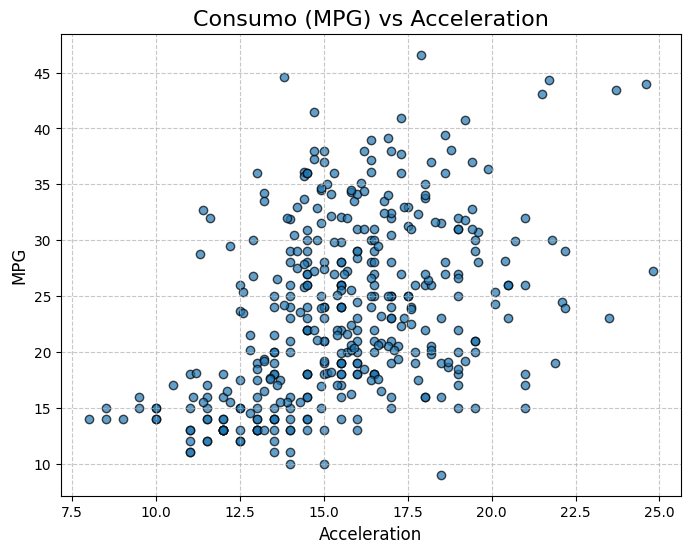

In [18]:
visualiza(X, y, 'acceleration')

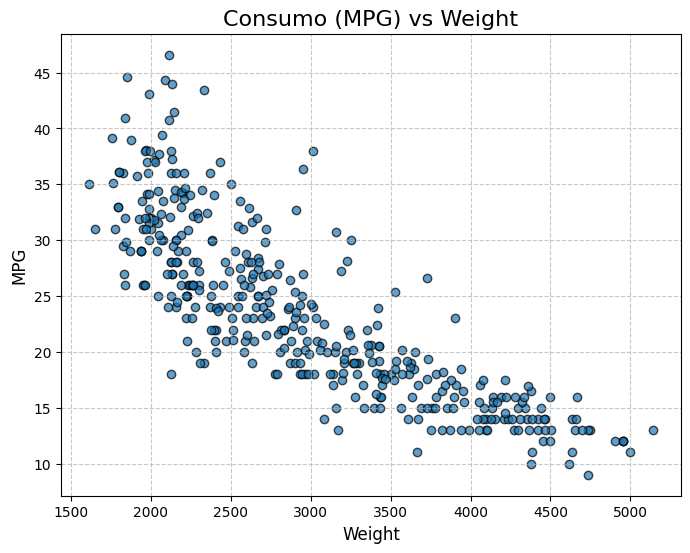

In [19]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal ser√≠a un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresi√≥n lineal solo con esta variable.

### 1.2 Implementaci√≥n del modelo

En este punto vamos a dar un paso atr√°s y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar servir√≠a para cualquier conjunto de datos.

Lo primero, implementa una funci√≥n que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene m√°s features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el n√∫mero de observaciones es menor.

In [20]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la f√≥rmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es as√≠
    if X.shape[1] > X.shape[0]:
        X = X.T
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la f√≥rmula
    # A√±ade una columna de unos para el t√©rmino independiente
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # TODO 3 Calcula los pesos
    # w = (X^T X)^(-1) X^T y
    w = np.linalg.inv(X.T @ X) @ X.T @ y

    return w

In [21]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de m√≠nimos cuadrados y lo hemos probado en un array de tama√±o 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra funci√≥n `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gr√°fica. Tendr√°s que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

Dimensiones de X: (398, 1)
Dimensiones de y: (398, 1)
Coeficientes obtenidos: [[ 4.63173644e+01]
 [-7.67661006e-03]]


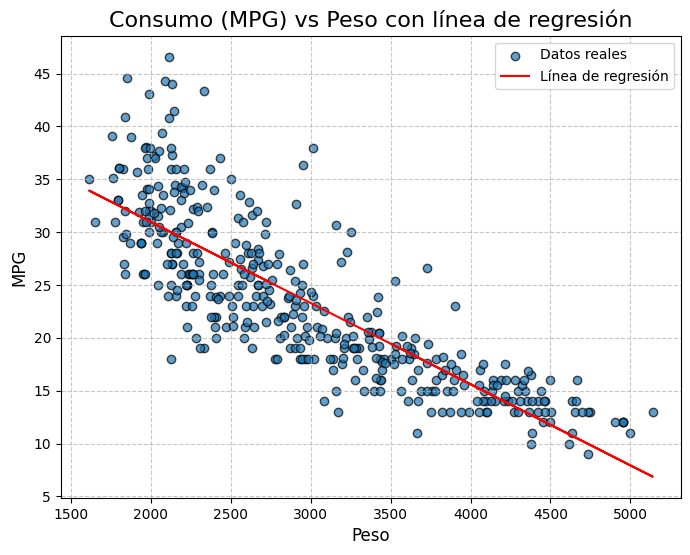

In [22]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Preparar los datos
# Seleccionar la variable weight como X y el consumo mpg como y
X = auto_mpg.data.features['weight'].to_numpy().reshape(-1, 1)  # Convertir a array numpy y asegurar 2D
y = auto_mpg.data.targets.to_numpy()  # Convertir a array numpy

# Verificar dimensiones
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

# Paso 2: Calcular los coeficientes
w = pesos_ols(X, y)
print("Coeficientes obtenidos:", w)

# Paso 3: Graficar los datos y la l√≠nea de regresi√≥n
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, edgecolor='k', label="Datos reales")  # Datos reales

# Generar los valores predichos usando la ecuaci√≥n del modelo
y_pred = w[0] + w[1] * X

# Dibujar la l√≠nea de regresi√≥n
plt.plot(X, y_pred, color='red', label="L√≠nea de regresi√≥n")

# Configuraci√≥n del gr√°fico
plt.title("Consumo (MPG) vs Peso con l√≠nea de regresi√≥n", fontsize=16)
plt.xlabel("Peso", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()




Por √∫ltimo, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementaci√≥n tiene buena pinta. Podemos ver c√≥mo funciona en la [documentaci√≥n](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [23]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y comp√°ralo con el de sklearn

Los resultados obtenidos con Scikit-learn coinciden con los coeficientes que se calcularon manualmente usando la f√≥rmula de m√≠nimos cuadrados. Esto confirma que la implementaci√≥n de la funci√≥n pesos_ols es correcta.
Resultados:

T√©rmino independiente (ùë§0):

F√≥rmula manual: 46.3173644

Scikit-learn: 46.31736442

Pendiente (ùë§1):

F√≥rmula manual: ‚àí0.00767661

Scikit-learn:  ‚àí0.00767661

### 1.4 Compara el m√©todo de m√≠nimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresi√≥n lineal



El m√©todo de m√≠nimos cuadrados es una forma de ajustar la l√≠nea recta a los datos en regresi√≥n lineal. Su objetivo es encontrar la l√≠nea que minimiza la diferencia entre los valores reales y los valores predichos por el modelo. Esto lo hace calculando los coeficientes que mejor representan esa relaci√≥n.

Por otro lado, el m√©todo de descenso del gradiente es una forma iterativa de encontrar los mejores coeficientes del modelo de regresi√≥n. En lugar de calcular todo de golpe como en los m√≠nimos cuadrados, aqu√≠ se ajustan los coeficientes poco a poco siguiendo la pendiente (el gradiente) de la funci√≥n de error.  El gradiente te dice hacia d√≥nde est√° el m√≠nimo de la funci√≥n, y el metodo da peque√±os pasos en esa direcci√≥n hasta llegar a dicho m√≠nimo.

## 2. Optimizaci√≥n con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la pr√°ctica, pero pod√©is hacerlo si quer√©is practicar m√°s sobre el m√©todo del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la soluci√≥n anal√≠tica. El descenso del gradiente es un m√©todo de optimizaci√≥n iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cu√°ndo tiene que parar y darnos la soluci√≥n. En este caso, le vamos a decir que pare y nos devuelva la soluci√≥n despu√©s de un n√∫mero de iteraciones que le pasaremos como par√°metro. La ecuaci√≥n iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra funci√≥n objetivo, y w es un vector. Para la funci√≥n objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS tambi√©n lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la funci√≥n objetivo de la regresi√≥n lineal. La funci√≥n necesitar√°:

- La entrada X y salida y de la regresi√≥n
- Un punto inicial desde el que empezar a iterar
- El n√∫mero de iteraciones 
- El learning rate

La funci√≥n nos devolver√° un array con las w resultantes de las iteraciones y otro con el valor de la funci√≥n en cada paso del algoritmo, a la que tambi√©n se conoce como *loss function*.

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la funci√≥n que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 A√±ade la columna de 1s
    
    
    # TODO 2 Haz un bucle para las iteraciones 
    # TODO 3 Dentro del bucle tendr√°s que actualizar el error y los pesos y a√±adirlos a las listas
    
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la funci√≥n que acabamos de programar.

In [62]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviaci√≥n est√°ndar. Despu√©s aplicamos la funci√≥n anterior y dibujamos.

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy() 

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate


# TODO 2 Aplicamos el algoritmo


# L√≠mites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gr√°fica
